## 0. 환경설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 시각화 관련
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from PIL import Image
from matplotlib import rc

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

## 1. 접근성

### 1-1. 탐색요인분석

In [29]:
d1 = pd.read_csv('data/접근성.csv')
d1.head()

,Unnamed: 0,자치구행정동,자치구,행정동,버스승객수,지하철승객수,버스정류장수,지하철역수,자전거대여소수,자전거도로수,주차장수
0,0,종로구 청운효자동,종로구,청운효자동,2044107.0,0.0,27.0,0.0,3.0,42,226.0
1,1,종로구 사직동,종로구,사직동,6971522.0,13394787.0,32.0,2.0,15.0,42,177.0
2,2,종로구 삼청동,종로구,삼청동,1201780.0,0.0,13.0,0.0,5.0,42,134.0
3,3,종로구 부암동,종로구,부암동,2550275.0,0.0,34.0,0.0,5.0,42,124.0
4,4,종로구 평창동,종로구,평창동,2325866.0,0.0,54.0,0.0,6.0,42,238.0


In [19]:
#스케일링
from sklearn.preprocessing import MinMaxScaler
d1_1 = d1.drop(['Unnamed: 0','자치구','행정동','자치구행정동'],axis = 1)
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(d1_1)
d1_1_s = min_max_scaler.transform(d1_1)
d1_1_s = pd.DataFrame(d1_1_s, columns=(d1_1).columns, index=list(d1_1.index.values))
print(d1_1_s.head())
print(d1_1_s.info())

      버스승객수    지하철승객수    버스정류장수     지하철역수   자전거대여소수    자전거도로수      주차장수
0  0.126389  0.000000  0.259615  0.000000  0.065217  0.191011  0.097920
1  0.431054  0.404963  0.307692  0.333333  0.326087  0.191011  0.076690
2  0.074307  0.000000  0.125000  0.000000  0.108696  0.191011  0.058059
3  0.157685  0.000000  0.326923  0.000000  0.108696  0.191011  0.053726
4  0.143810  0.000000  0.519231  0.000000  0.130435  0.191011  0.103120
<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 425
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   버스승객수    426 non-null    float64
 1   지하철승객수   426 non-null    float64
 2   버스정류장수   426 non-null    float64
 3   지하철역수    426 non-null    float64
 4   자전거대여소수  426 non-null    float64
 5   자전거도로수   426 non-null    float64
 6   주차장수     426 non-null    float64
dtypes: float64(7)
memory usage: 26.6 KB
None


In [20]:
# Bartlett test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(d1_1_s)
chi_square_value, p_value 

(880.0735923454893, 9.177259041201564e-173)

In [21]:
#KMO검정
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model = calculate_kmo(d1_1_s)
kmo_model

0.6099470657506119

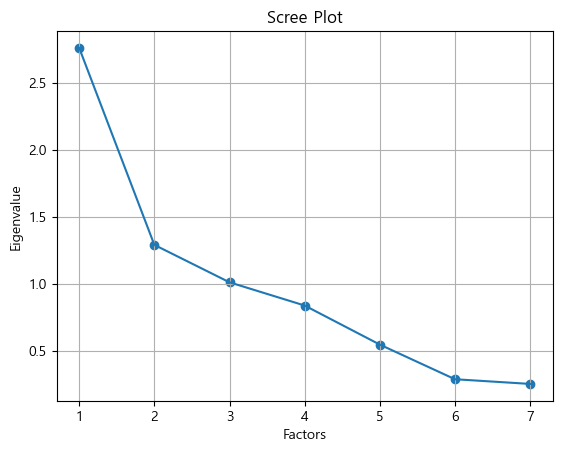

In [22]:
#scress plot
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors = 10, rotation = None)
fa.fit(d1_1_s)
ev,v = fa.get_eigenvalues()
plt.scatter(range(1,d1_1_s.shape[1]+1),ev)
plt.plot(range(1,d1_1_s.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [23]:
fa = FactorAnalyzer(n_factors=3,rotation = "varimax")
fa.fit(d1_1_s)
efa_result = pd.DataFrame(fa.loadings_,index = d1_1_s.columns)
efa_result

,0,1,2
버스승객수,0.407063,0.534889,-0.031922
지하철승객수,0.055184,0.996938,0.107114
버스정류장수,0.875650,0.106796,-0.028484
지하철역수,0.379963,0.464389,0.139560
자전거대여소수,0.728985,0.255411,0.215182
자전거도로수,-0.072014,-0.065030,0.997737
주차장수,0.123794,0.120996,0.298620


<AxesSubplot: >

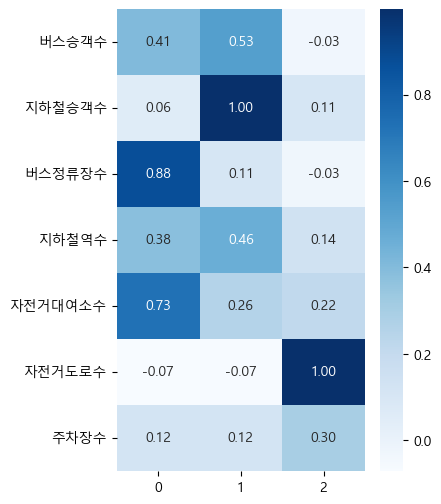

In [24]:
plt.figure(figsize = (4,6))
sns.heatmap(efa_result,cmap = "Blues",annot = True, fmt = '.2f')

In [25]:
#값나온대로 변경하기
efa_result['mean'] = (efa_result[0] +efa_result[1] +efa_result[2])/3
efa_result

,0,1,2,mean
버스승객수,0.407063,0.534889,-0.031922,0.303343
지하철승객수,0.055184,0.996938,0.107114,0.386412
버스정류장수,0.875650,0.106796,-0.028484,0.317987
지하철역수,0.379963,0.464389,0.139560,0.327971
자전거대여소수,0.728985,0.255411,0.215182,0.399859
자전거도로수,-0.072014,-0.065030,0.997737,0.286898
주차장수,0.123794,0.120996,0.298620,0.181137


In [26]:
print('가중치_접근성')
print('1위 자전거대여소수:',round(0.399859/(0.399859+0.386412+0.327971+0.317987+0.303343+0.286898+0.181137),2))
print('2위 지하철승객수:',round(0.386412/(0.399859+0.386412+0.327971+0.317987+0.303343+0.286898+0.181137),2))
print('3위 지하철역수:',round(0.327971/(0.399859+0.386412+0.327971+0.317987+0.303343+0.286898+0.181137),2))
print('4위 버스정류장수:',round(0.317987/(0.399859+0.386412+0.327971+0.317987+0.303343+0.286898+0.181137),2))
print('5위 버스승객수:',round(0.303343/(0.399859+0.386412+0.327971+0.317987+0.303343+0.286898+0.181137),2))
print('6위 자전거도로수:',round(0.286898/(0.399859+0.386412+0.327971+0.317987+0.303343+0.286898+0.181137),2))
print('7위 주차장수:',round(0.181137/(0.399859+0.386412+0.327971+0.317987+0.303343+0.286898+0.181137),2))

가중치_접근성
1위 자전거대여소수: 0.18
2위 지하철승객수: 0.18
3위 지하철역수: 0.15
4위 버스정류장수: 0.14
5위 버스승객수: 0.14
6위 자전거도로수: 0.13
7위 주차장수: 0.08


### 1-2. 접근성_최종지표

In [31]:
accessibility_final = pd.concat([d1[['자치구','행정동']], d1_1_s],axis = 1)
accessibility_final['접근성지표'] = (accessibility_final['자전거대여소수']*0.18 + accessibility_final['지하철승객수']*0.18 
                             + accessibility_final['지하철역수']*0.15 + accessibility_final['버스정류장수']*0.14
                             + accessibility_final['버스승객수']*0.14 + accessibility_final['자전거도로수']*0.13
                             + accessibility_final['버스승객수']*0.08)
accessibility_final.sort_values(by = ['접근성지표'],ascending = False,inplace = True)
#accessibility_final.rename(columns = {'Gu':'자치구명'},inplace=True)
print(accessibility_final.head())
print(accessibility_final.shape)
print(accessibility_final['접근성지표'].shape)
print(accessibility_final['행정동'].shape)

      자치구          행정동     버스승객수    지하철승객수    버스정류장수     지하철역수   자전거대여소수  \
288  영등포구          여의동  0.791133  0.672876  0.548077  0.833333  0.978261   
214   마포구          서교동  0.858472  1.000000  0.798077  0.666667  0.304348   
221   마포구          상암동  0.451991  0.180537  0.894231  0.500000  0.695652   
251   강서구        가양제1동  0.212763  0.242898  0.500000  0.666667  1.000000   
8     종로구  종로1.2.3.4가동  1.000000  0.816794  0.298077  0.000000  0.304348   

       자전거도로수      주차장수     접근성지표  
288  0.466292  0.331889  0.733603  
214  0.320225  0.406846  0.677007  
221  0.320225  0.061958  0.498974  
251  0.398876  0.051993  0.492383  
8    0.191011  0.152946  0.488368  
(426, 10)
(426,)
(426,)


In [33]:
accessibility_dong = accessibility_final.drop(['버스승객수','지하철승객수','버스정류장수',
                                '지하철역수','자전거대여소수','자전거도로수',
                                '주차장수'],axis=1)
accessibility_dong.sort_values(by = ['접근성지표'],ascending = False,inplace= True)

print(accessibility_dong.head())
print(accessibility_dong.shape)
accessibility_dong= accessibility_dong.drop_duplicates()
print(accessibility_dong.head())
print(accessibility_dong.shape)

      자치구          행정동     접근성지표
288  영등포구          여의동  0.733603
214   마포구          서교동  0.677007
221   마포구          상암동  0.498974
251   강서구        가양제1동  0.492383
8     종로구  종로1.2.3.4가동  0.488368
(426, 3)
      자치구          행정동     접근성지표
288  영등포구          여의동  0.733603
214   마포구          서교동  0.677007
221   마포구          상암동  0.498974
251   강서구        가양제1동  0.492383
8     종로구  종로1.2.3.4가동  0.488368
(426, 3)


In [34]:
accessibility_dong.to_csv('[221026]accessibility_dong.csv')

## 2. 상업

### 2-1. 탐색요인분석

In [66]:
d1 = pd.read_csv('data/상업.csv')
d1.drop(['Unnamed: 0'],axis = 1,inplace=True)
d1.drop_duplicates(inplace=True)
print(d1.head())
print(d1.nunique())

     자치구명    행정동  SUM_SELNG_AMT  SUM_SELNG_CO  운영_영업_개월_평균  폐업_영업_개월_평균
0     종로구  청운효자동    76717519157       4891664       106.00        61.25
1000  종로구    사직동   294186825721      18441604       130.75        61.25
2728  종로구    삼청동    93482870462       4547785       102.50        57.00
3071  종로구    부암동    35862202180       2678128       105.25        59.25
3098  종로구    평창동    70961467717       3319554       123.25        60.50
자치구명              25
행정동              416
SUM_SELNG_AMT    417
SUM_SELNG_CO     417
운영_영업_개월_평균      179
폐업_영업_개월_평균       96
dtype: int64


In [67]:
from sklearn.preprocessing import MinMaxScaler
d1_1 = d1.drop(['자치구명','행정동'],axis = 1)
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(d1_1)
d1_1_s = min_max_scaler.transform(d1_1)
d1_1_s = pd.DataFrame(d1_1_s, columns=(d1_1).columns, index=list(d1_1.index.values))
print(d1_1_s.head())
print(d1_1_s.info())

      SUM_SELNG_AMT  SUM_SELNG_CO  운영_영업_개월_평균  폐업_영업_개월_평균
0          0.040253      0.047720     0.482944     0.274747
1000       0.159064      0.183721     0.660682     0.274747
2728       0.049413      0.044269     0.457810     0.240404
3071       0.017933      0.025503     0.477558     0.258586
3098       0.037109      0.031941     0.606822     0.268687
<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 52079
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SUM_SELNG_AMT  417 non-null    float64
 1   SUM_SELNG_CO   417 non-null    float64
 2   운영_영업_개월_평균    417 non-null    float64
 3   폐업_영업_개월_평균    417 non-null    float64
dtypes: float64(4)
memory usage: 16.3 KB
None


In [68]:
# Bartlett test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(d1_1_s)
chi_square_value, p_value 

(1138.0125356163192, 1.2429347379415767e-242)

In [69]:
#KMO검정
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model = calculate_kmo(d1_1_s)
kmo_model

0.5011010513731167

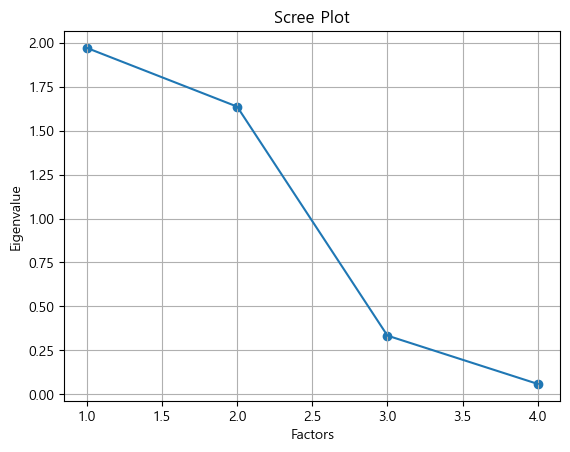

In [70]:
#scress plot
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors = 10, rotation = None)
fa.fit(d1_1_s)
ev,v = fa.get_eigenvalues()
plt.scatter(range(1,d1_1_s.shape[1]+1),ev)
plt.plot(range(1,d1_1_s.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [71]:
fa = FactorAnalyzer(n_factors=3,rotation = "varimax")
fa.fit(d1_1_s)
efa_result = pd.DataFrame(fa.loadings_,index = d1_1_s.columns)
efa_result

,0,1,2
SUM_SELNG_AMT,0.970647,-0.016422,0.042845
SUM_SELNG_CO,0.968635,-0.064958,-0.038414
운영_영업_개월_평균,0.029150,0.815111,0.038297
폐업_영업_개월_평균,-0.053953,0.815697,-0.037521


<AxesSubplot: >

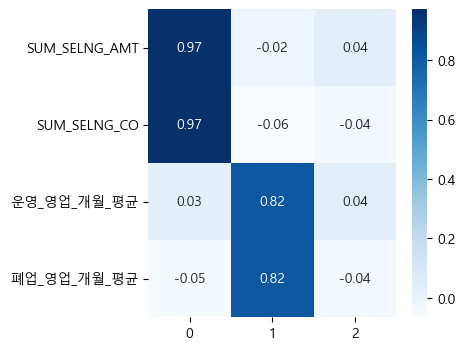

In [72]:
plt.figure(figsize = (4,4))
sns.heatmap(efa_result,cmap = "Blues",annot = True, fmt = '.2f')

In [73]:
#값나온대로 변경하기
efa_result['mean'] = (efa_result[0] +efa_result[1]+efa_result[2])/3
efa_result

,0,1,2,mean
SUM_SELNG_AMT,0.970647,-0.016422,0.042845,0.332357
SUM_SELNG_CO,0.968635,-0.064958,-0.038414,0.288421
운영_영업_개월_평균,0.029150,0.815111,0.038297,0.294186
폐업_영업_개월_평균,-0.053953,0.815697,-0.037521,0.241408


In [74]:
print('가중치_상업')
print('1위 SUM_SELNG_AMT:',round(0.332357/(0.332357+0.294186+0.288421+0.241408),2))
print('2위 운영_영업_개월_평균:',round(0.294186/(0.332357+0.294186+0.288421+0.241408),2))
print('3위 SUM_SELNG_CO:',round(0.288421/(0.332357+0.294186+0.288421+0.241408),2))
print('4위 폐업_영업_개월_평균:',round(0.241408/(0.332357+0.294186+0.288421+0.241408),2))


가중치_상업
1위 SUM_SELNG_AMT: 0.29
2위 운영_영업_개월_평균: 0.25
3위 SUM_SELNG_CO: 0.25
4위 폐업_영업_개월_평균: 0.21


### 2-2. 상업_최종지표

In [75]:
commercial_final = pd.concat([d1[['자치구명','행정동']], d1_1_s],axis = 1)
commercial_final['상업지표'] = (commercial_final['SUM_SELNG_AMT']*0.29 + commercial_final['운영_영업_개월_평균']*0.25 
                             + commercial_final['SUM_SELNG_CO']*0.25 + commercial_final['폐업_영업_개월_평균']*0.21)
                             
commercial_final.sort_values(by = ['상업지표'],ascending = False,inplace = True)
#accessibility_final.rename(columns = {'Gu':'자치구명'},inplace=True)
print(commercial_final.head())
print(commercial_final.shape)
print(commercial_final['상업지표'].shape)
print(commercial_final['행정동'].shape)

      자치구명          행정동  SUM_SELNG_AMT  SUM_SELNG_CO  운영_영업_개월_평균  \
51930  강남구         역삼1동       1.000000      1.000000     0.477558   
3387   종로구  종로1.2.3.4가동       0.629086      0.573802     0.804309   
50066  마포구          서교동       0.846377      0.830552     0.377020   
30877   중구           명동       0.498397      0.527745     0.836625   
52030  송파구         가락1동       0.135054      0.065196     1.000000   

       폐업_영업_개월_평균      상업지표  
51930     0.167677  0.694602  
3387      0.339394  0.598236  
50066     0.169697  0.582979  
30877     0.254545  0.539082  
52030     1.000000  0.515465  
(417, 7)
(417,)
(417,)


In [76]:
commercial_dong = commercial_final.drop(['SUM_SELNG_AMT','SUM_SELNG_CO','운영_영업_개월_평균',
                                '폐업_영업_개월_평균'],axis=1)
commercial_dong.sort_values(by = ['상업지표'],ascending = False,inplace= True)

print(commercial_dong.head())
print(commercial_dong.shape)


      자치구명          행정동      상업지표
51930  강남구         역삼1동  0.694602
3387   종로구  종로1.2.3.4가동  0.598236
50066  마포구          서교동  0.582979
30877   중구           명동  0.539082
52030  송파구         가락1동  0.515465
(417, 3)


In [77]:
commercial_dong.to_csv('[221026]commercial_dong.csv')

## 3. 주거

### 3-1. 탐색요인분석

In [52]:
d1 = pd.read_csv('data/주거.csv')
d1.head()

,Unnamed: 0,자치구행정동,자치구,행정동,인구수,생활인구,주택수
0,0,종로구 청운효자동,종로구,청운효자동,12177,1.314577e+07,4134.0
1,1,종로구 사직동,종로구,사직동,9636,1.831985e+07,2778.0
2,2,종로구 삼청동,종로구,삼청동,2739,3.799452e+06,730.0
3,3,종로구 부암동,종로구,부암동,9782,1.057895e+07,3070.0
4,4,종로구 평창동,종로구,평창동,18329,1.304180e+07,5958.0


In [53]:
from sklearn.preprocessing import MinMaxScaler
d1_1 = d1.drop(['Unnamed: 0','자치구','행정동','자치구행정동'],axis = 1)
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(d1_1)
d1_1_s = min_max_scaler.transform(d1_1)
d1_1_s = pd.DataFrame(d1_1_s, columns=(d1_1).columns, index=list(d1_1.index.values))
print(d1_1_s.head())
print(d1_1_s.info())

        인구수      생활인구       주택수
0  0.215383  0.178611  0.220433
1  0.169900  0.248912  0.148128
2  0.046449  0.051623  0.038925
3  0.172514  0.143736  0.163698
4  0.325499  0.177199  0.317692
<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 425
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   인구수     426 non-null    float64
 1   생활인구    426 non-null    float64
 2   주택수     426 non-null    float64
dtypes: float64(3)
memory usage: 13.3 KB
None


In [54]:
# Bartlett test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(d1_1_s)
chi_square_value, p_value 

(1032.443454555368, 1.6483356122888054e-223)

In [55]:
#KMO검정
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model = calculate_kmo(d1_1_s)
kmo_model

0.6298886039450345

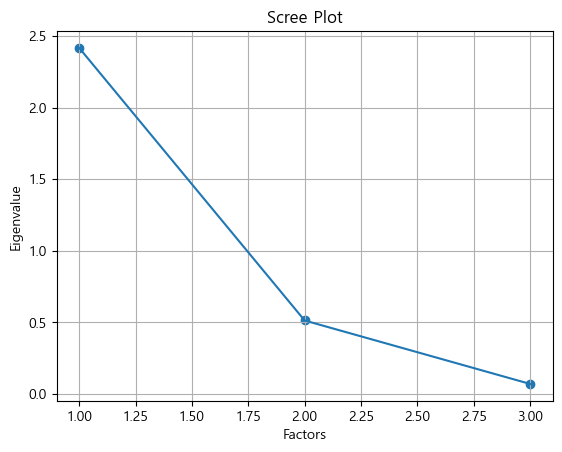

In [56]:
#scress plot
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors = 10, rotation = None)
fa.fit(d1_1_s)
ev,v = fa.get_eigenvalues()
plt.scatter(range(1,d1_1_s.shape[1]+1),ev)
plt.plot(range(1,d1_1_s.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [57]:
fa = FactorAnalyzer(n_factors=1,rotation = "varimax")
fa.fit(d1_1_s)
efa_result = pd.DataFrame(fa.loadings_,index = d1_1_s.columns)
efa_result

,0
인구수,-1.001796
생활인구,-0.613762
주택수,-0.919548


In [58]:
fa = FactorAnalyzer(n_factors=2,rotation = "varimax")
fa.fit(d1_1_s)
efa_result = pd.DataFrame(fa.loadings_,index = d1_1_s.columns)
efa_result

,0,1
인구수,0.722738,0.677568
생활인구,0.344227,0.550635
주택수,0.804913,0.507904


<AxesSubplot: >

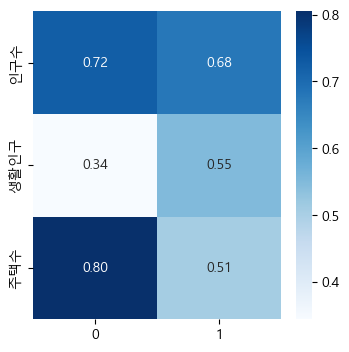

In [59]:
plt.figure(figsize = (4,4))
sns.heatmap(efa_result,cmap = "Blues",annot = True, fmt = '.2f')

In [60]:
#값나온대로 변경하기
efa_result['mean'] = (efa_result[0] +efa_result[1])/2
efa_result

,0,1,mean
인구수,0.722738,0.677568,0.700153
생활인구,0.344227,0.550635,0.447431
주택수,0.804913,0.507904,0.656408


In [61]:
print('가중치_주거')
print('1위 인구수:',round(0.700153/(0.700153+0.656408+0.447431),2))
print('2위 주택수:',round(0.656408/(0.700153+0.656408+0.447431),2))
print('3위 생활인구:',round(0.447431/(0.700153+0.656408+0.447431),2))


가중치_주거
1위 인구수: 0.39
2위 주택수: 0.36
3위 생활인구: 0.25


### 3-2. 주거_최종지표

In [63]:
residence_final = pd.concat([d1[['자치구','행정동']], d1_1_s],axis = 1)
residence_final['주거지표'] = (residence_final['인구수']*0.39 + residence_final['주택수']*0.36 
                             + residence_final['생활인구']*0.25 )
residence_final.sort_values(by = ['주거지표'],ascending = False,inplace = True)
#accessibility_final.rename(columns = {'Gu':'자치구명'},inplace=True)
print(residence_final.head())
print(residence_final.shape)
print(residence_final['주거지표'].shape)
print(residence_final['행정동'].shape)

     자치구    행정동       인구수      생활인구       주택수      주거지표
191  은평구    진관동  1.000000  0.587438  0.914258  0.865993
244  강서구  화곡제1동  0.941970  0.466745  1.000000  0.844055
236  양천구   신정3동  0.892013  0.417842  0.823291  0.748731
423  강동구     길동  0.820309  0.531368  0.787885  0.736401
368  강남구   역삼1동  0.652359  1.000000  0.639597  0.734675
(426, 6)
(426,)
(426,)


In [64]:
residence_dong = residence_final.drop(['인구수','생활인구','주택수'],axis=1)
residence_dong.sort_values(by = ['주거지표'],ascending = False,inplace= True)

print(residence_dong.head())
print(residence_dong.shape)
residence_dong= residence_dong.drop_duplicates()
print(residence_dong.head())
print(residence_dong.shape)

     자치구    행정동      주거지표
191  은평구    진관동  0.865993
244  강서구  화곡제1동  0.844055
236  양천구   신정3동  0.748731
423  강동구     길동  0.736401
368  강남구   역삼1동  0.734675
(426, 3)
     자치구    행정동      주거지표
191  은평구    진관동  0.865993
244  강서구  화곡제1동  0.844055
236  양천구   신정3동  0.748731
423  강동구     길동  0.736401
368  강남구   역삼1동  0.734675
(426, 3)


In [65]:
residence_dong.to_csv('[221026]residence_dong.csv')

## 4. 학교

In [5]:
d1 = pd.read_csv('data/school_법정동.csv')
print(d1.head())
print(d1.info())

   Unnamed: 0                   도로명         위도          경도  법정동
0           0     서울특별시 강남구 자곡로 150  37.472191  127.099434  자곡동
1           1  서울특별시 강남구 밤고개로21길 15  37.474524  127.108306  자곡동
2           2      서울특별시 강남구 자곡로 81  37.471924  127.091949  자곡동
3           3      서울특별시 강남구 자곡로 55  37.468777  127.090952  세곡동
4           4     서울특별시 강남구 역삼로 541  37.505562  127.061815  대치동
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879 entries, 0 to 3878
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3879 non-null   int64  
 1   도로명         3879 non-null   object 
 2   위도          3848 non-null   float64
 3   경도          3848 non-null   float64
 4   법정동         3879 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 151.6+ KB
None


In [13]:
d2 = pd.read_csv('data/kid_법정동.csv')
d2 = d2[['법정동','만3세유아수','만4세유아수','만5세유아수','혼합유아수','특수유아수']]
print(d2.head())
print(d2.info())
print(d2['법정동'].nunique())

   법정동  만3세유아수  만4세유아수  만5세유아수  혼합유아수  특수유아수
0  독산동     8.0    13.0    21.0      0    3.0
1  송파동    25.0    37.0    37.0      0    NaN
2  문정동    37.0    16.0    17.0      0    NaN
3  신내동    13.0    22.0    16.0      0    4.0
4   묵동    10.0     2.0    14.0      0    NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   법정동     932 non-null    object 
 1   만3세유아수  785 non-null    float64
 2   만4세유아수  829 non-null    float64
 3   만5세유아수  874 non-null    float64
 4   혼합유아수   932 non-null    int64  
 5   특수유아수   130 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 43.8+ KB
None
221


In [16]:
df_dong = pd.read_csv('data/행정구역전처리.csv')
print(df_dong.head())
print(df_dong['행정구역명'].nunique())
print(df_dong['행정동'].nunique())
print(df_dong['법정동'].nunique())

   Unnamed: 0 자치구명  행정구역명    행정동  법정동   행정구역분류
0           2  종로구  청운효자동  청운효자동  청운동  1101072
1           3  종로구  청운효자동  청운효자동  신교동  1101072
2           4  종로구  청운효자동  청운효자동  궁정동  1101072
3           5  종로구  청운효자동  청운효자동  효자동  1101072
4           6  종로구  청운효자동  청운효자동  창성동  1101072
425
425
465


In [ ]:
school_dong_1 = pd.merge(d1,df_dong)
school_dong_1.drop([])